**Random forest - Marco Patiño and Armando Rodríguez**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing      # Preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from numpy.random import choice
import lime
import lime.lime_tabular
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
import eli5

In [ ]:
random_state = 10000

Read and split csv

In [ ]:
df = pd.read_csv('botNoBot2018_preprocessed.csv',lineterminator='\n')

Y = df["category"]
X = df.drop(columns="category", axis=1);

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, train_size=0.8, shuffle=True, stratify=Y, random_state=random_state);

Default model

In [ ]:
model = RandomForestClassifier(random_state=random_state)
model.fit(Xtrain,Ytrain)
pred = model.predict(Xtest);
print(sklearn.metrics.confusion_matrix(Ytest,pred));
print(sklearn.metrics.accuracy_score(Ytest,pred));
cvacc = cross_val_score(RandomForestClassifier(random_state=random_state), X=Xtrain,  y=Ytrain, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())
print('Std. 10-fold cross on train data= ', cvacc.std())
print(sklearn.metrics.classification_report(Ytest,pred));

[[937 137]
 [154 971]]
0.8676671214188267
Acc. 10-fold cross on train data=  0.8806893163719103
Std. 10-fold cross on train data=  0.008901174754374809
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1074
           1       0.88      0.86      0.87      1125

    accuracy                           0.87      2199
   macro avg       0.87      0.87      0.87      2199
weighted avg       0.87      0.87      0.87      2199



Grid search for tuning

In [ ]:
n_estimators = list(np.arange(10,205,5))
max_features = ['auto', 'sqrt', 'log2']
max_depth = list(np.arange(10,100,5))
max_depth.append(None)
min_samples_split = list(np.arange(2,20,1))
min_samples_leaf = list(np.arange(1,20,1))
bootstrap = [True, False]
criterion = ["gini","entropy"]

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'criterion': criterion,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=165,max_features='auto',criterion='entropy',max_depth=25,bootstrap=True,min_samples_leaf=1,min_samples_split=2,random_state=random_state), param_grid, cv=10, n_jobs=-1)
grid_search.fit(Xtrain,Ytrain)
print(grid_search.best_params_)

Best model found

In [ ]:
model = RandomForestClassifier(n_estimators=165,max_features='auto',criterion='entropy',max_depth=25,bootstrap=True,min_samples_leaf=1,min_samples_split=2,random_state=random_state)
model.fit(Xtrain,Ytrain)
pred = model.predict(Xtest);
print(sklearn.metrics.confusion_matrix(Ytest,pred));
print(sklearn.metrics.accuracy_score(Ytest,pred));
cvacc = cross_val_score(RandomForestClassifier(random_state=random_state), X=Xtrain,  y=Ytrain, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())
print('Std. 10-fold cross on train data= ', cvacc.std())

[[941 133]
 [151 974]]
0.8708503865393361
Acc. 10-fold cross on train data=  0.8806893163719103
Std. 10-fold cross on train data=  0.008901174754374809


Classification report

In [ ]:
print(sklearn.metrics.classification_report(Ytest,pred));

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1074
           1       0.88      0.87      0.87      1125

    accuracy                           0.87      2199
   macro avg       0.87      0.87      0.87      2199
weighted avg       0.87      0.87      0.87      2199



ROC curves

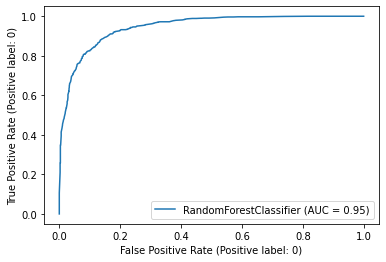

In [ ]:
RocCurveDisplay.from_estimator(model, Xtest, Ytest, pos_label=0)

Weights explanation

In [ ]:
eli5.explain_weights(model, feature_names=list(X.columns))

Explanation(estimator="RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=165,\n                       random_state=10000)", description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='profile_age', weight=0.1671325945913197, std=0.06823341585848913, value=None), FeatureWeight(feature='favourites_count', weight=0.15498388309460046, std=0.04982980161614134, value=None), FeatureWeight(feature='followers_count', weight=0.14276447373280649, std=0.045701632575433394, value=None), FeatureWeight(feature='favourites_age_rate', weight=0.13369674665349285, std=0.04953177275391281, value=None), FeatureWeight(feature='statuses_age_rate', weight=0.11835564336031708, std=0.060298466926371294, value=None), FeatureWeight(feature='statuses_count', weight=0.0956910539721515, std=0.02687030719052889, value=None), FeatureWeight(feature='friends_count', weight=0.0674403606983091, std=0.03478591278904664, value=None), FeatureWeight(feature='friends_rate', weight=0.05154635501555325, std=0.010975328421157827, value=None), FeatureWeight(feature='listed_count', weight=0.032483790816595574, std=0.011135999270830838, value=None), FeatureWeight(feature='default_profile', weight=0.01931031011559177, std=0.007825158857676696, value=None), FeatureWeight(feature='geo_enabled', weight=0.012456287334512291, std=0.006932256106922841, value=None), FeatureWeight(feature='profile_use_background_image', weight=0.004138500614750057, std=0.0015198105262094308, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

Feature importance

In [ ]:
pi = permutation_importance(model,Xtest, Ytest, n_jobs=-1, random_state=0)

var_imp = pd.DataFrame({'importance': pi.importances_mean},
                       index=X.columns)

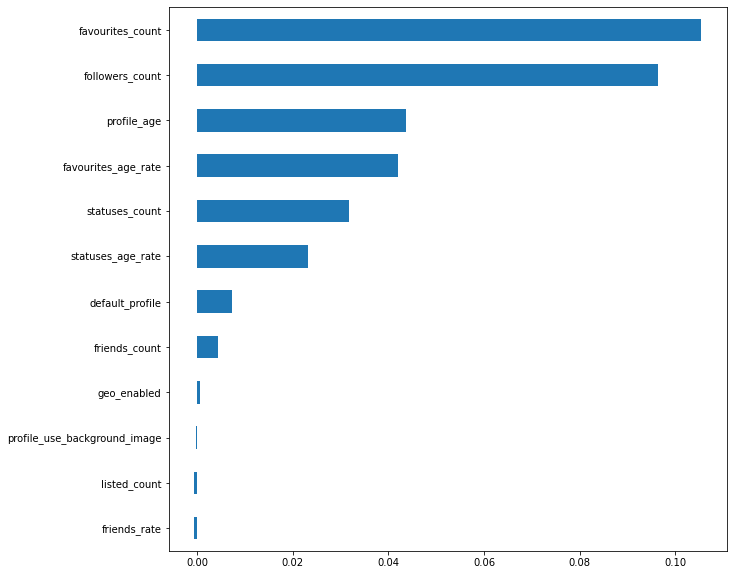

In [ ]:
var_imp.sort_values(by='importance').plot.barh(figsize=(10,10),
                                               legend=False);

Examples to check

In [ ]:
extremeBig = X.iloc[6666]
extremeSmall = X.iloc[8089]
missClassified = X.iloc[10809]
print(missClassified)

followers_count                  11.000000
friends_count                    11.000000
listed_count                      0.000000
favourites_count                206.000000
geo_enabled                       0.000000
statuses_count                  314.000000
profile_use_background_image      1.000000
default_profile                   1.000000
profile_age                      75.393530
statuses_age_rate                 4.164814
favourites_age_rate               2.732330
friends_rate                      0.500000
Name: 10809, dtype: float64


LIME to explain examples

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(Xtrain.to_numpy(), feature_names=list(X.columns),class_names=['human', 'bot'], verbose=True, mode='classification')
exp = explainer.explain_instance(missClassified.to_numpy(), model.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True)

/home/odnam/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.4021839047323064
Prediction_local [0.43480306]
Right: 0.6787878787878788
